In [17]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

comebacks = pd.read_csv('playoffComebacks.csv')
leads = pd.read_csv('playoffLeads.csv')
comeback_mean = []
lead_mean = []

years = range(1997,2025)

for col in leads.columns:
    sum = 0
    clean_col = leads[col].dropna()
    for tup in clean_col:
        nums = re.findall(r'\d+', tup)
        sum += int(nums[0])
    sum /= len(clean_col)
    lead_mean.append(sum)

for col in comebacks.columns:
    sum = 0
    clean_col = comebacks[col].dropna()
    for tup in clean_col:
        nums = re.findall(r'\d+', tup)
        sum += int(nums[0])
    sum /= len(clean_col)
    comeback_mean.append(sum)

print(lead_mean)
print(comeback_mean)

[np.float64(27.0625), np.float64(28.0625), np.float64(24.3125), np.float64(29.375), np.float64(29.25), np.float64(26.5), np.float64(28.8125), np.float64(26.1875), np.float64(29.125), np.float64(28.4375), np.float64(26.125), np.float64(30.1875), np.float64(33.4375), np.float64(31.0), np.float64(25.375), np.float64(29.5), np.float64(29.6875), np.float64(29.9375), np.float64(31.0), np.float64(36.5625), np.float64(34.8125), np.float64(31.6875), np.float64(33.125), np.float64(33.5), np.float64(32.875), np.float64(34.5), np.float64(31.3125), np.float64(35.875)]
[8.041666666666666, 8.309859154929578, 8.43939393939394, 8.32, 8.450704225352112, 8.380281690140846, 8.397727272727273, 7.7439024390243905, 8.214285714285714, 8.426966292134832, 7.949367088607595, 8.348837209302326, 7.2823529411764705, 8.25609756097561, 9.037037037037036, 9.214285714285714, 8.023529411764706, 9.202247191011235, 8.567901234567902, 7.953488372093023, 8.291139240506329, 9.048780487804878, 9.426829268292684, 9.19277108433

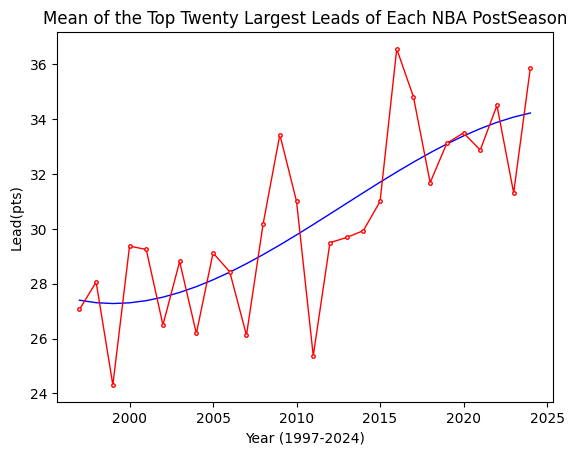

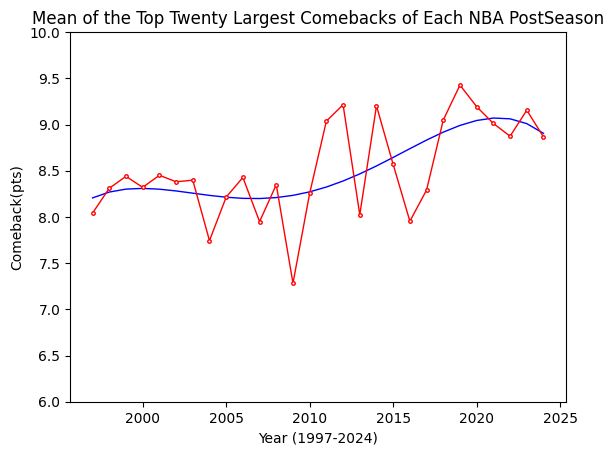

In [25]:
coefficients = np.polyfit(years, lead_mean, deg=3)
trendline = np.poly1d(coefficients)
trendline_y = trendline(years)
plt.plot(years, trendline_y, color='blue', linewidth=1)
plt.plot(years, lead_mean, color='red', linewidth=1, marker='.', markersize=5, markerfacecolor='white')
#plt.ylim(14,22)
plt.ylabel('Lead(pts)')
plt.xlabel('Year (1997-2024)')
plt.title('Mean of the Top Twenty Largest Leads of Each NBA PostSeason')
plt.show()


coefficients = np.polyfit(years, comeback_mean, deg=4)
trendline = np.poly1d(coefficients)
trendline_y = trendline(years)
plt.plot(years, trendline_y, color='blue', linewidth=1)
plt.plot(years, comeback_mean, color='red', linewidth=1, marker='.', markersize=5, markerfacecolor='white')
plt.ylim(6,10)
plt.ylabel('Comeback(pts)')
plt.xlabel('Year (1997-2024)')
plt.title('Mean of the Top Twenty Largest Comebacks of Each NBA PostSeason')
plt.show()

In [19]:
largest_comebacks = []
largest_leads = []


for col in leads.columns:
    largestL = []
    clean_col = leads[col].dropna()
    for cell in clean_col:
        nums = re.findall(r'\d+', cell)
        largestL.append(int(nums[0]))
    largestL.sort(reverse=True)
    largestL = largestL[:21]
    largest_leads.append(np.mean(largestL))

for col in comebacks.columns:
    largestCB = []
    clean_col = comebacks[col].dropna()
    for cell in clean_col:
        nums = re.findall(r'\d+', cell)
        largestCB.append(int(nums[0]))
    largestCB.sort(reverse=True)
    largestCB = largestCB[:21]
    largest_comebacks.append(np.mean(largestCB))

print(largest_leads)
print(largest_comebacks)

[np.float64(25.523809523809526), np.float64(25.952380952380953), np.float64(22.904761904761905), np.float64(27.047619047619047), np.float64(27.38095238095238), np.float64(24.904761904761905), np.float64(27.666666666666668), np.float64(25.285714285714285), np.float64(27.333333333333332), np.float64(27.0), np.float64(24.904761904761905), np.float64(28.80952380952381), np.float64(31.666666666666668), np.float64(29.333333333333332), np.float64(23.857142857142858), np.float64(27.80952380952381), np.float64(27.904761904761905), np.float64(28.571428571428573), np.float64(29.047619047619047), np.float64(34.57142857142857), np.float64(32.714285714285715), np.float64(30.333333333333332), np.float64(31.333333333333332), np.float64(31.238095238095237), np.float64(31.238095238095237), np.float64(32.857142857142854), np.float64(29.61904761904762), np.float64(34.095238095238095)]
[np.float64(13.80952380952381), np.float64(13.380952380952381), np.float64(14.142857142857142), np.float64(14.238095238095

In [20]:
leadsCol = leads['2001']
cleanCol = leadsCol.dropna()
clean = list()
pairs = dict()
for cell in cleanCol:
    nums = re.findall(r'\d+', cell)
    clean.append(int(nums[0]))
    pairs[cell[-12:-2]] = int(nums[0])

clean = np.array(clean)
sortedClean = np.array(clean)
sortedClean.sort()

print(cleanCol)
print(sortedClean)
print(pairs)

0     (28, '200104210MIA')
1     (32, '200104230MIA')
2     (27, '200104270CHH')
3     (13, '200104220MIL')
4     (11, '200104250MIL')
              ...         
66    (15, '200106060LAL')
67    (13, '200106080LAL')
68    (13, '200106100PHI')
69    (22, '200106130PHI')
70    (19, '200106150PHI')
Name: 2001, Length: 71, dtype: object
[ 7  9  9  9 10 10 10 11 11 12 12 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 15 15 15 15 15 16 16 16 16 16 16 16 17 17 17 17 17 18 18 19 19 19 19
 19 20 20 21 22 22 22 24 25 25 25 26 27 28 28 28 29 31 32 33 34 34 39]
{'0104210MIA': 28, '0104230MIA': 32, '0104270CHH': 27, '0104220MIL': 13, '0104250MIL': 11, '0104280ORL': 14, '0105010ORL': 16, '0104210PHI': 18, '0104240PHI': 19, '0104280IND': 15, '0105020IND': 9, '0104220NYK': 7, '0104260NYK': 24, '0104290TOR': 10, '0105020TOR': 16, '0105040NYK': 13, '0104210UTA': 13, '0104240UTA': 20, '0104280DAL': 13, '0105010DAL': 31, '0105030UTA': 17, '0104220LAL': 20, '0104260LAL': 25, '0104290POR': 15, '0104220SAC': 9, 

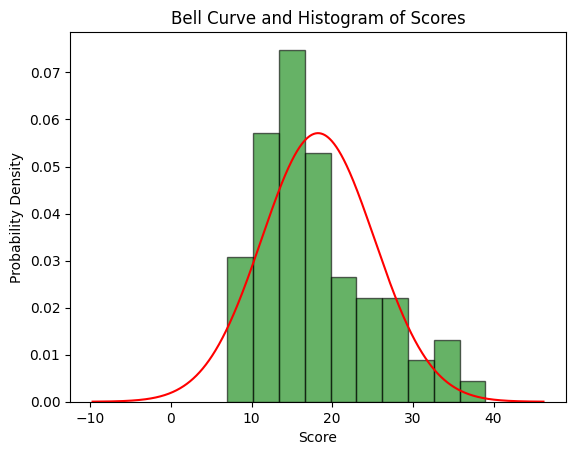

In [21]:
import scipy.stats as stats

games = range(1,len(clean)+1)
std_dev = np.std(clean)
mean = np.mean(clean)
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)
plt.hist(clean, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, color='red')
plt.xlabel('Score')
plt.ylabel('Probability Density')
plt.title('Bell Curve and Histogram of Scores')
plt.show()

In [22]:
yearsLeads = ['2007', '2008', '2009', '2010', '2011', '2016', '2017', '2021']
yearsComebacks = ['2004', '2009', '2011', '2012', '2014', '2015', '2016', '2017', '2018']
listOfCleanLCol= []
listOfCleanCCol = []
for year in yearsLeads:
    leadsCol = leads[year]
    cleanCol = leadsCol.dropna()
    clean = list()
    for cell in cleanCol:
        nums = re.findall(r'\d+', cell)
        clean.append(int(nums[0]))  
    clean = np.array(clean)
    listOfCleanLCol.append(clean)

for year in yearsComebacks:
    comebCol = comebacks[year]
    cleanCol = comebCol.dropna()
    clean = list()
    for cell in cleanCol:
        nums = re.findall(r'\d+', cell)
        clean.append(int(nums[0]))      
    clean = np.array(clean)
    listOfCleanCCol.append(clean)

print(listOfCleanCCol)

[array([ 2,  7, 12,  7,  4,  7,  9,  6,  7, 12,  2,  3, 11, 11,  8, 10,  8,
        9, 10,  7,  8,  8,  5, 14,  9,  4,  4,  0,  7,  0,  7,  9, 11,  8,
       16,  4,  4, 10,  6,  4, 12,  0,  8, 12, 11,  6,  5,  5,  9,  9,  6,
       10, 10,  2,  2, 11, 16,  8, 11, 14, 15, 17,  9,  9, 13,  9,  9,  2,
        3,  8, 14,  7,  3,  3,  6, 10, 13,  5, 11,  0,  5,  7]), array([ 2,  0,  9,  8, 11, 12,  0,  7, 11, 13, 10, 18,  7, 17, 11,  6,  3,
        5,  2,  0,  0,  4,  5,  6,  4,  2, 13,  7,  4,  3,  4, 16,  2,  9,
       13,  1,  0,  9,  0,  0,  7,  2, 11, 11,  5,  9, 15,  8,  0,  7,  0,
        0,  9, 11,  6, 14,  6,  7,  4, 12,  7,  5,  0,  0,  9, 14, 10,  2,
       16, 23, 10,  8, 22,  4, 13, 14,  8,  1,  7,  6,  5,  7,  9, 12,  9]), array([12,  9,  6,  5,  0, 14,  0, 10, 16, 11, 12, 11,  0,  4,  8, 10, 14,
       16,  2,  4, 10,  8, 15,  7, 16, 14, 12,  9,  4,  9,  9,  4, 10,  8,
        9, 23,  8, 12, 13,  0,  9,  6,  9, 11,  3,  0,  8, 15,  2,  4,  8,
       11, 11, 10, 16,  8,  8,  

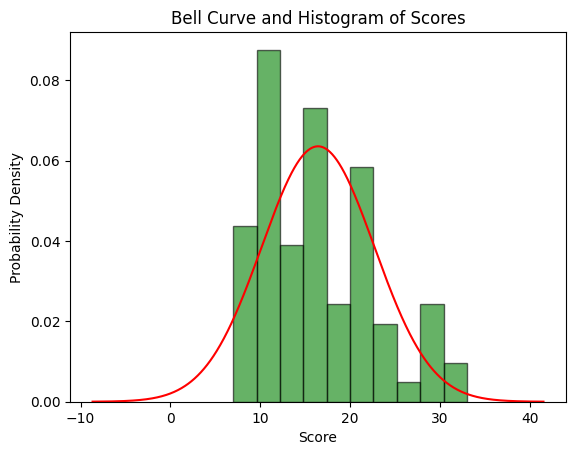

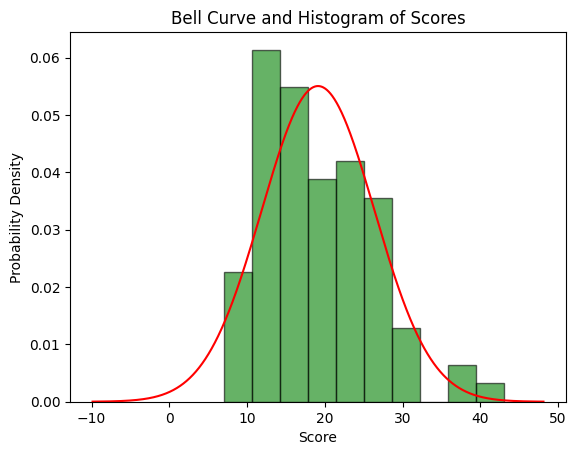

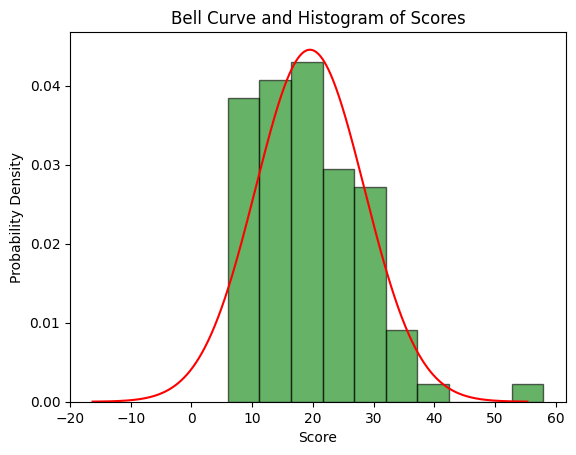

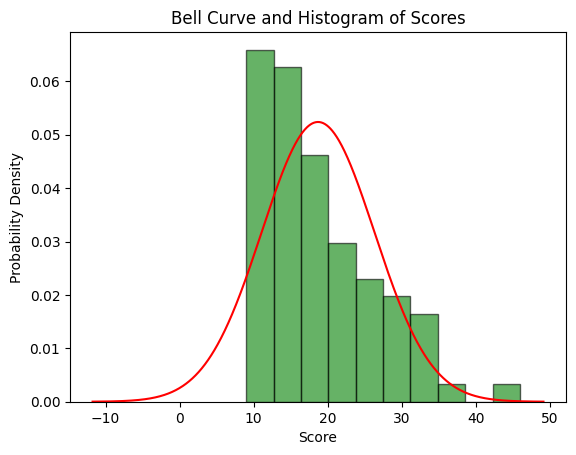

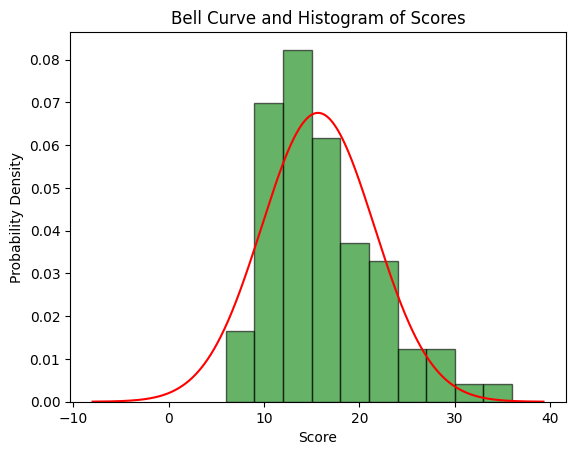

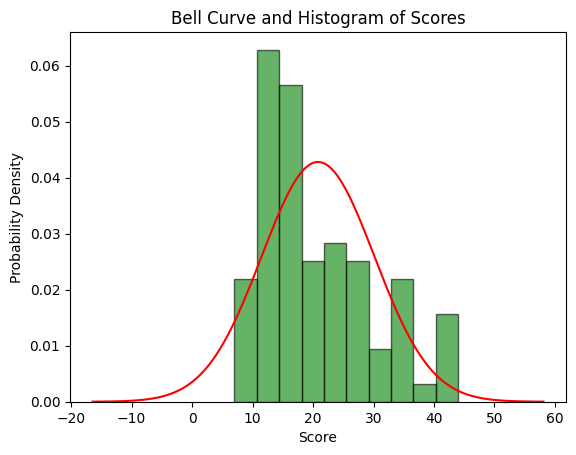

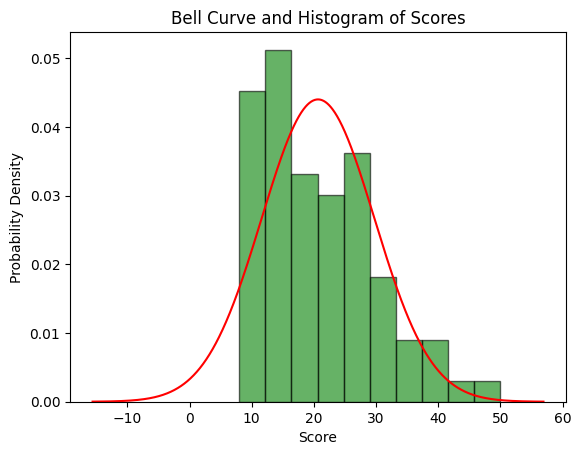

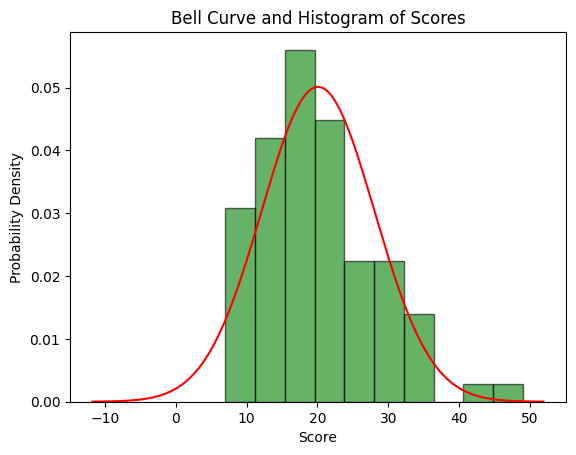

In [23]:
for clean in listOfCleanLCol:
    games = range(1,len(clean)+1)
    std_dev = np.std(clean)
    mean = np.mean(clean)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)
    plt.hist(clean, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.plot(x, y, color='red')
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title('Bell Curve and Histogram of Scores')
    plt.show()


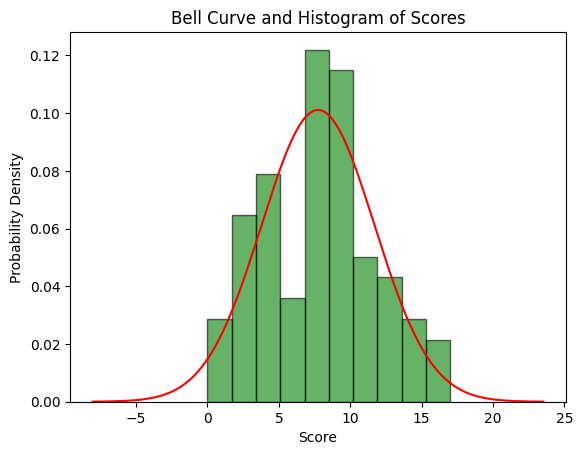

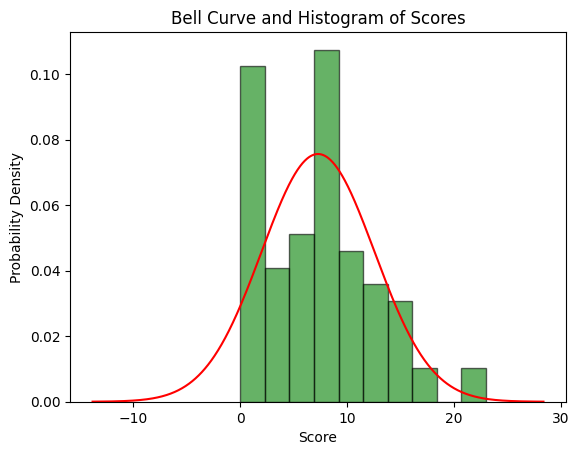

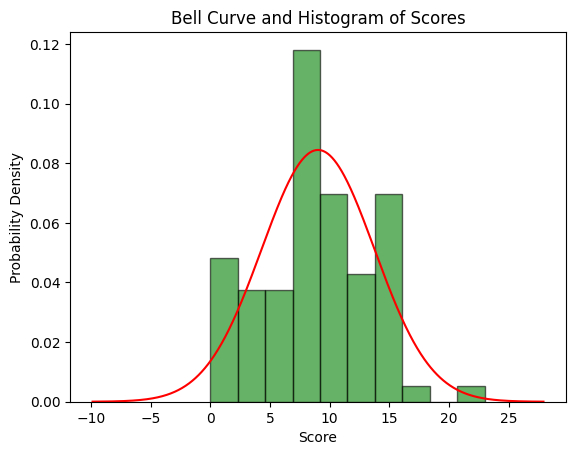

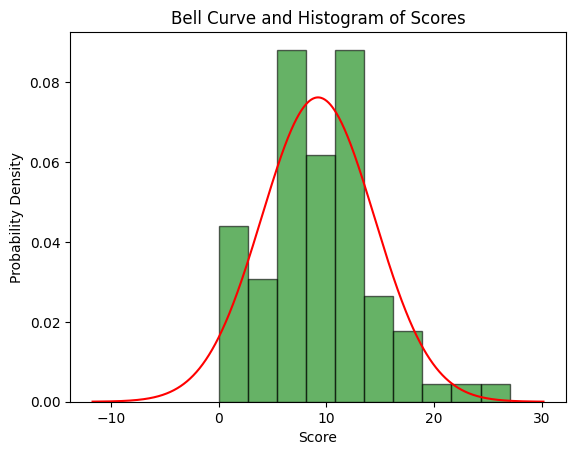

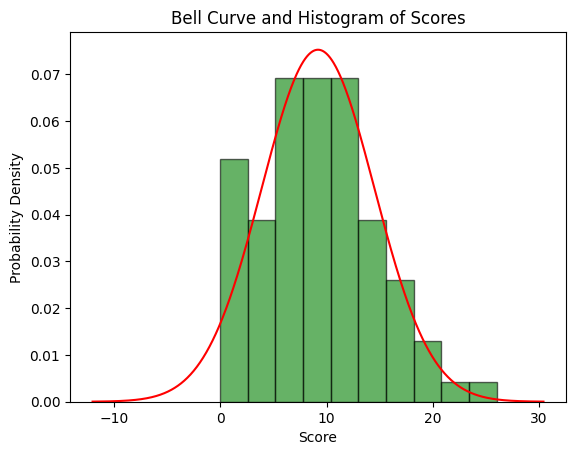

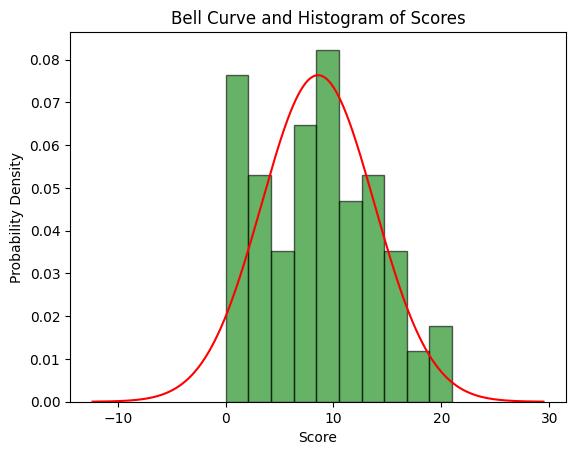

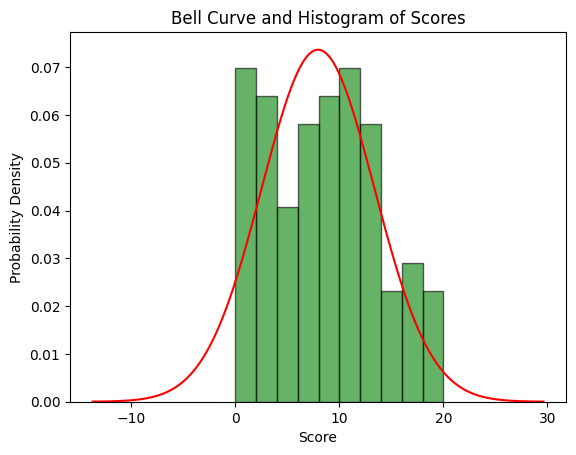

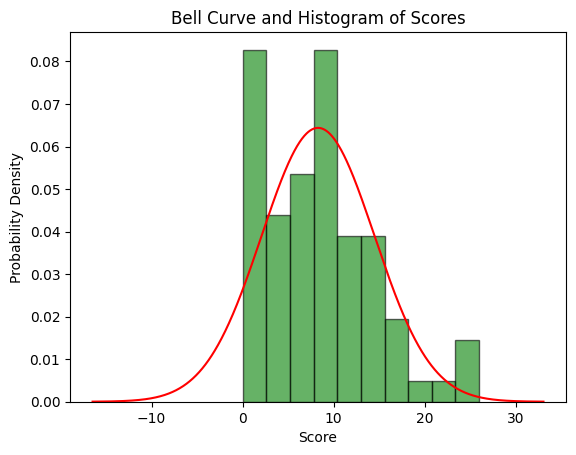

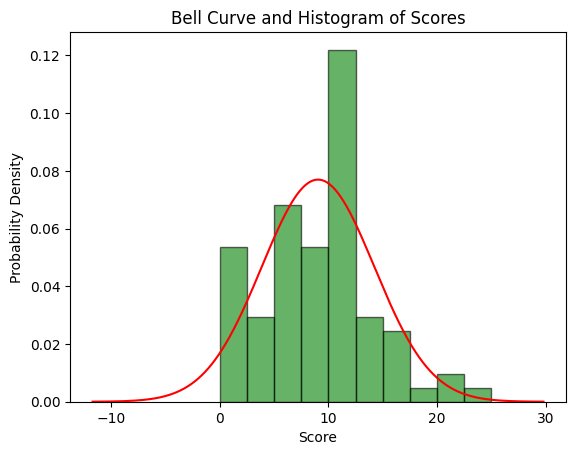

In [24]:
for clean in listOfCleanCCol:
    games = range(1,len(clean)+1)
    std_dev = np.std(clean)
    mean = np.mean(clean)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)
    plt.hist(clean, bins=10, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.plot(x, y, color='red')
    plt.xlabel('Score')
    plt.ylabel('Probability Density')
    plt.title('Bell Curve and Histogram of Scores')
    plt.show()